# Feature Engineering - 부동산 기본 특성(심승우)
        
### 수치형 변수:        
     - `LotFrontage`: 부동산과 연결된 도로 길이 (피트)
     - `LotArea`: 대지 크기 (평방 피트)
           
### 범주형 변수:      
    - `MSSubClass`: 건물 유형        
    - `MSZoning`: 일반적인 구역 분류        
    - `Street`: 도로 접근 유형        
    - `LotShape`: 대지의 일반적인 형태        
    - `LandContour`: 대지의 평탄도        
    - `Utilities`: 사용 가능한 유틸리티 종류        
    - `LotConfig`: 대지 구성        
    - `LandSlope`: 대지의 경사도        
    - `Neighborhood`: Ames 시 경계 내 물리적 위치        
    - `Condition1`: 주요 도로 또는 철도와의 인접성        
    - `Condition2`: 주요 도로 또는 철도와의 인접성 (두 번째가 있을 경우)

In [35]:
# 필요한 라이브러리 임포트

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy.stats import norm 
import sklearn
from scipy import stats 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import requests
from matplotlib import font_manager
import matplotlib.dates as mdates
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

# 나눔고딕 폰트 다운로드
url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
response = requests.get(url)

# 다운로드한 폰트를 파일로 저장
with open("NanumGothic.ttf", "wb") as f:
    f.write(response.content)

# 폰트 설치
font_manager.fontManager.addfont('NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

# 마이너스 기호 표기 가능하게 수정
plt.rcParams['axes.unicode_minus'] = False

In [36]:
# 전처리된 훈련데이터 불러기기
train_data = pd.read_csv('processed_data.csv')
pd.set_option('display.max_columns', None)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [37]:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [38]:
pd.set_option('display.max_rows', 20)

In [39]:
# 부동산 기본 특성 컬럼만 따로 모아보기
basic_cols = ['LotFrontage', 
              'LotArea', 
              'MSSubClass', 
              'MSZoning', 
              'Street', 
              'LotShape', 
              'LandContour', 
              'Utilities', 
              'LotConfig', 
              'LandSlope',
              'Neighborhood',
              'Condition1',
              'Condition2',
              'SalePrice']

In [40]:
train_data_basic = train_data[basic_cols]
train_data_basic.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,65.0,8450,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,208500
1,80.0,9600,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,181500
2,68.0,11250,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,223500
3,60.0,9550,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,140000
4,84.0,14260,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,250000


In [41]:
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   int64  
 2   MSSubClass    1422 non-null   int64  
 3   MSZoning      1422 non-null   object 
 4   Street        1422 non-null   object 
 5   LotShape      1422 non-null   object 
 6   LandContour   1422 non-null   object 
 7   Utilities     1422 non-null   object 
 8   LotConfig     1422 non-null   object 
 9   LandSlope     1422 non-null   object 
 10  Neighborhood  1422 non-null   object 
 11  Condition1    1422 non-null   object 
 12  Condition2    1422 non-null   object 
 13  SalePrice     1422 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 155.7+ KB


In [42]:
# LotConfig(대지의 배치)가 Inside(내부 토지)인 경우 이외에도 LotFrontage가 NA인지 확인
train_data[train_data['LotFrontage'].isnull()]['LotConfig'].value_counts()

Series([], Name: count, dtype: int64)

내부 대지뿐 아니라 도로와 접한 대지인 경우에도 LotFrontage가 NA로 나타나고 있음.        
논리적 결측치 뿐 아니라 단순 결측치가 섞여 있다고 보이나, 일단 임의로 중앙값으로 대체하도록 하겠음

In [44]:
# MSSubClass는 단순 명목형 feature이므로 dtype을 object로 변경
train_data_basic['MSSubClass'] = train_data_basic['MSSubClass'].astype('object')
train_data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   int64  
 2   MSSubClass    1422 non-null   object 
 3   MSZoning      1422 non-null   object 
 4   Street        1422 non-null   object 
 5   LotShape      1422 non-null   object 
 6   LandContour   1422 non-null   object 
 7   Utilities     1422 non-null   object 
 8   LotConfig     1422 non-null   object 
 9   LandSlope     1422 non-null   object 
 10  Neighborhood  1422 non-null   object 
 11  Condition1    1422 non-null   object 
 12  Condition2    1422 non-null   object 
 13  SalePrice     1422 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 155.7+ KB


In [45]:
train_data_basic.describe(include = 'all')

,LotFrontage,LotArea,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
count,1422.000000,1422.000000,1422.0,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422.000000
unique,NaN,NaN,15.0,5,2,4,4,2,5,3,25,9,8,NaN
top,NaN,NaN,20.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,NaN
freq,NaN,NaN,520.0,1118,1416,892,1277,1421,1023,1345,215,1230,1407,NaN
mean,70.146723,10549.149789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182889.092124
std,22.260343,10097.991235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79414.407095
min,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34900.000000
25%,60.000000,7585.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131625.000000
50%,70.049958,9501.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165000.000000
75%,79.000000,11635.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000.000000


In [46]:
# 수치형과 범주형(명목형, 서열형)으로 컬럼을 3가지로 분류
basic_cols_num=['LotFrontage', 'LotArea', 'SalePrice']
basic_cols_nom=['MSSubClass', 
              'MSZoning', 
              'Street', 
              'Utilities', 
              'LotConfig', 
              'Neighborhood',
              'Condition1',
              'Condition2']
basic_cols_ord=['LotShape', 
                'LandContour',
                'LandSlope']

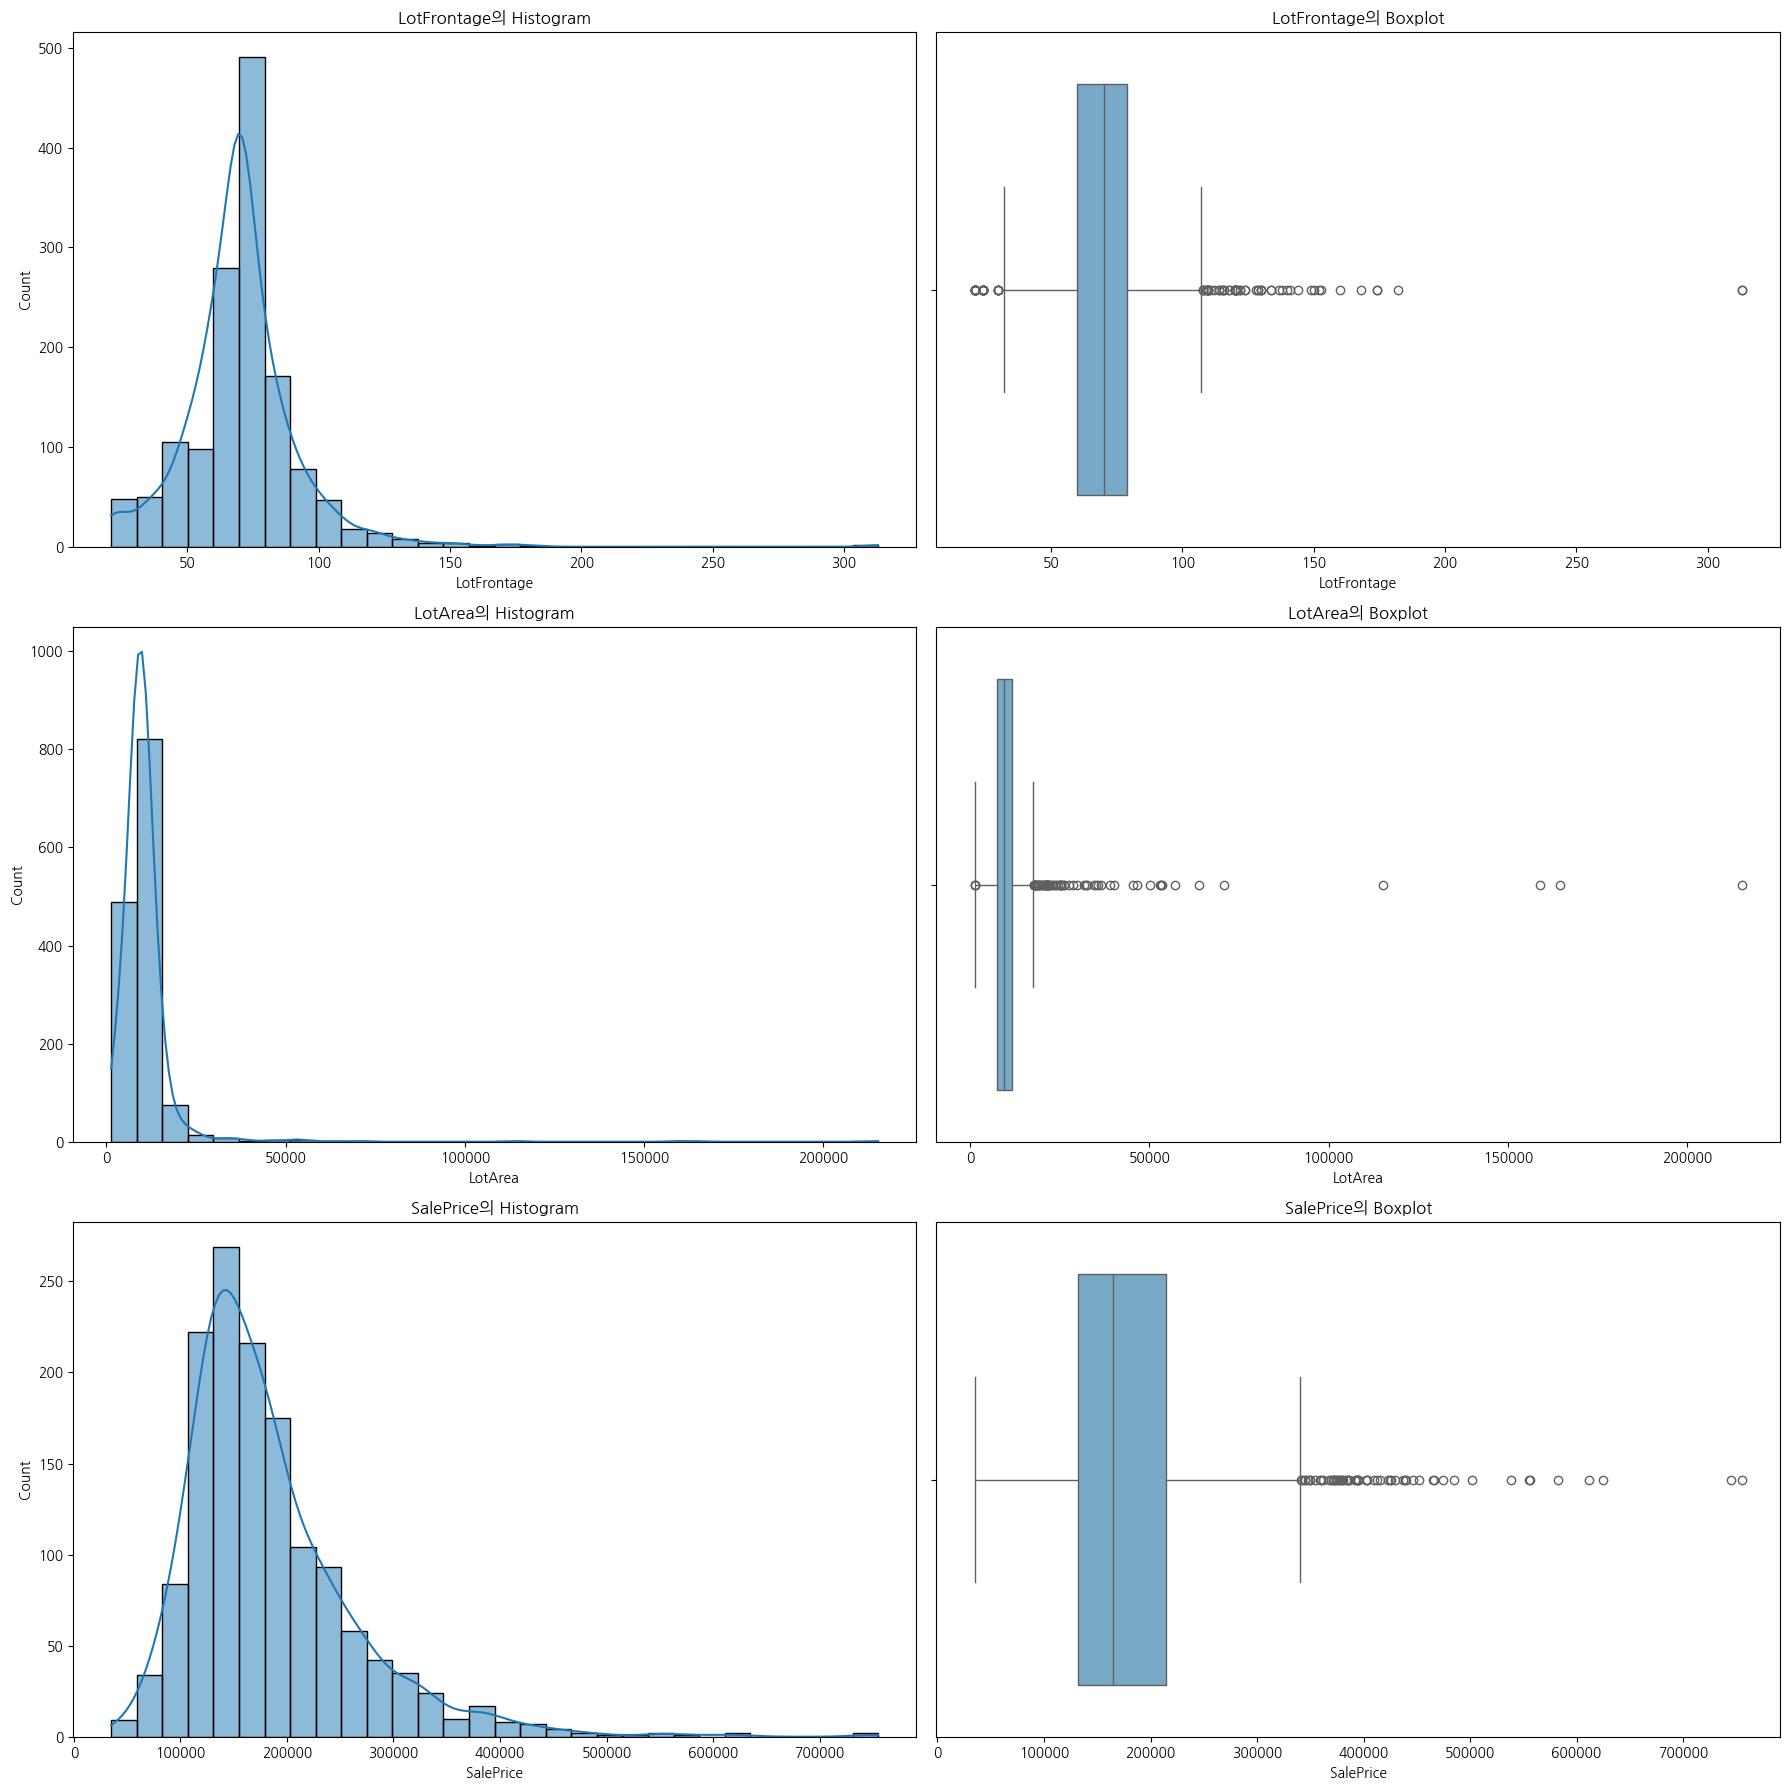

In [47]:
# 연속형 변수 분포 및 이상치 확인
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)  
sns.histplot(train_data_basic, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(3, 2, 2) 
sns.boxplot(data=train_data_basic, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(3, 2, 3) 
sns.histplot(train_data_basic, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(3, 2, 4) 
sns.boxplot(data=train_data_basic, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

plt.subplot(3, 2, 5) 
sns.histplot(train_data_basic, x='SalePrice', bins=30, kde=True, palette='Blues')
plt.title('SalePrice의 Histogram')

plt.subplot(3, 2, 6) 
sns.boxplot(data=train_data_basic, x='SalePrice', palette='Blues')
plt.title('SalePrice의 Boxplot')

# 그래프 출력
plt.tight_layout()
plt.show()

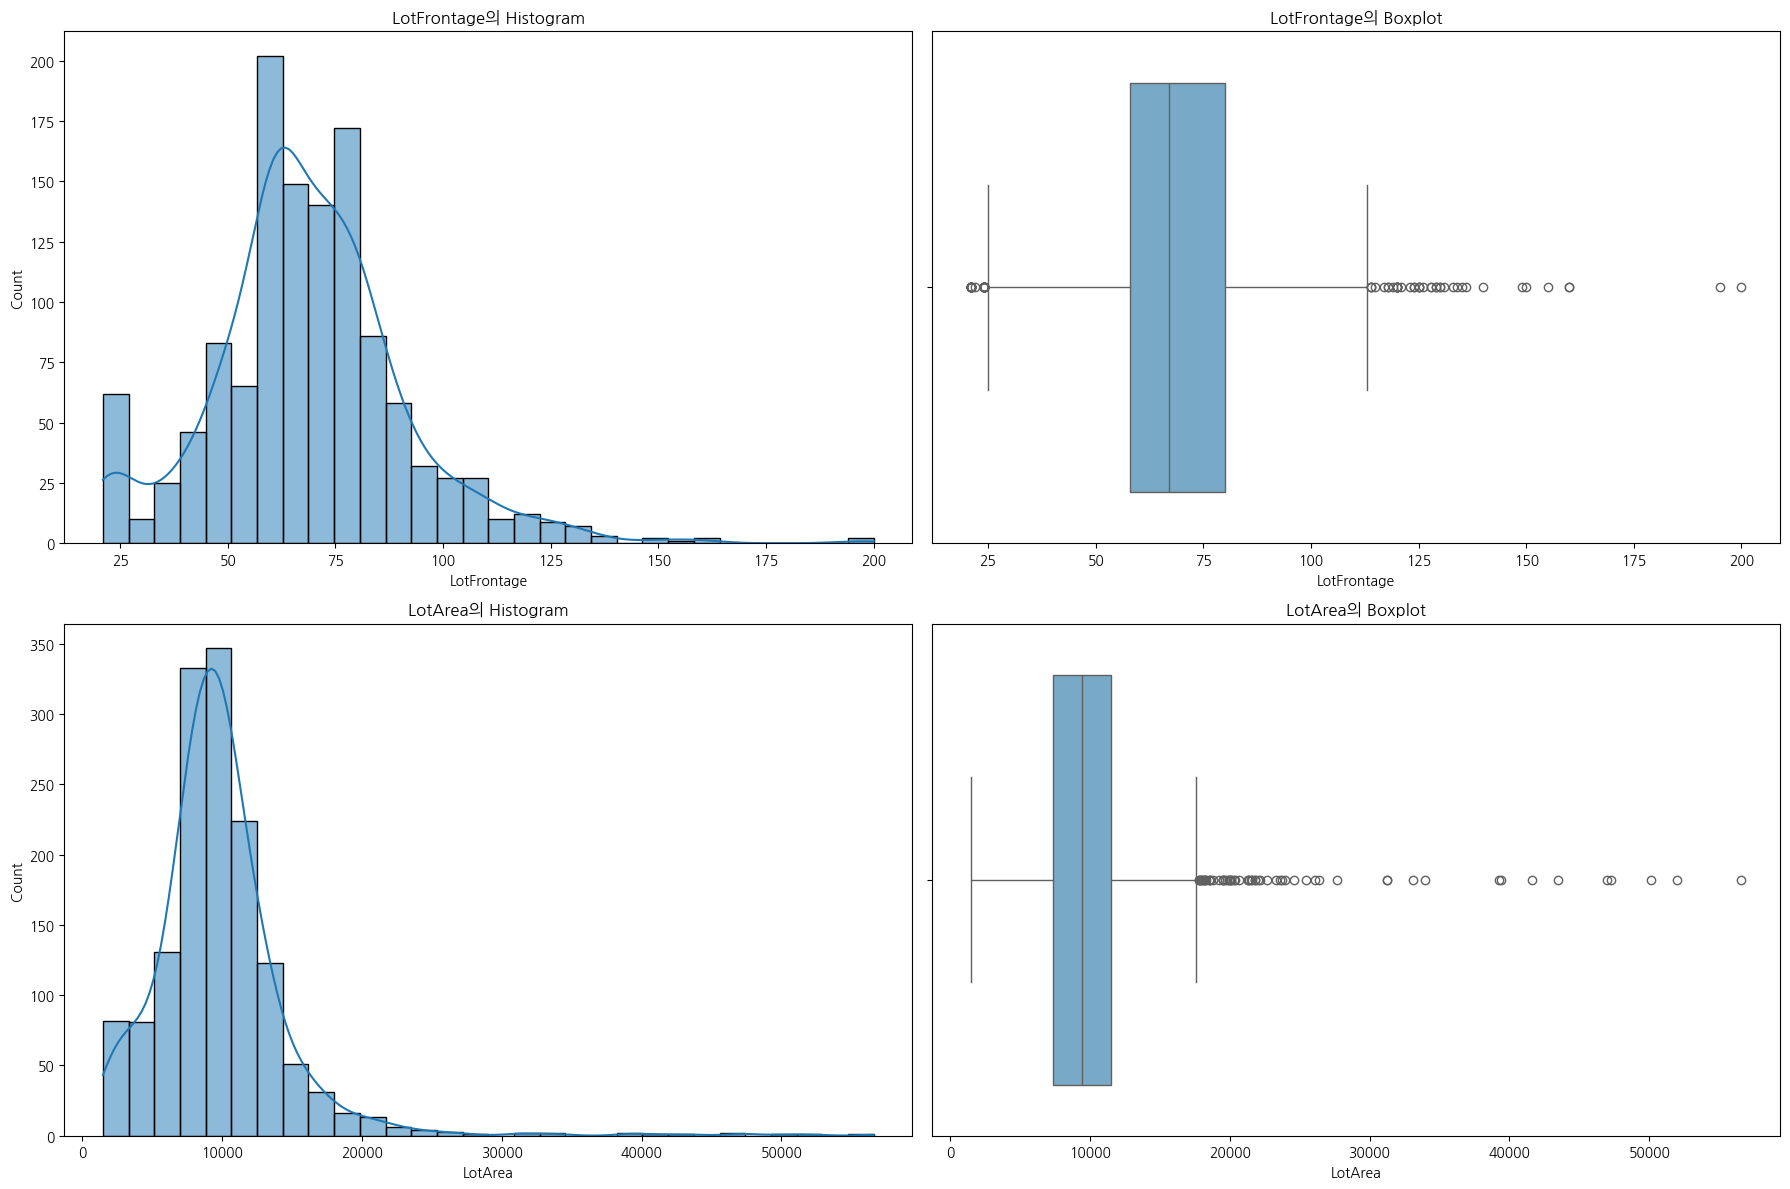

In [32]:
# test 데이터셋과 분포 비교
test_data = pd.read_csv('test.csv')

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)  
sns.histplot(test_data, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(2, 2, 2) 
sns.boxplot(data=test_data, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(2, 2, 3) 
sns.histplot(test_data, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(2, 2, 4) 
sns.boxplot(data=test_data, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

# 그래프 출력
plt.tight_layout()
plt.show()

기본적으로 train 데이터와 test 데이터 모두 세 피쳐 모두 꼬리가 모두 꼬리가 긴 형태의(왜도가 양수인) 분포가 나타나고 있어        
Boxplot 상의 모든 이상치를 삭제하는 것은 적절치 않아보임.     
다만 train 데이터셋이 상대적으로 더 꼬리가 길고 더욱 극단적인 수치가 일부 나타나고 있어,      
test 데이터 상의 최대값을 넘어가는 극단치들만 제거(대체)하는 것이 적절해보임.      
(이후 Standard나 robust Scaler로 feature scaling 진행)

In [71]:
# 이상치 중앙값으로 대체
train_data_basic['LotFrontage'].where(
    train_data_basic['LotFrontage'] < test_data['LotFrontage'].agg('max'), 
    other=test_data['LotFrontage'].agg('median'), 
    inplace=True)

train_data_basic['LotArea'].where(
    train_data_basic['LotArea'] < test_data['LotArea'].agg('max'), 
    other=test_data['LotArea'].agg('median'), 
    inplace=True)

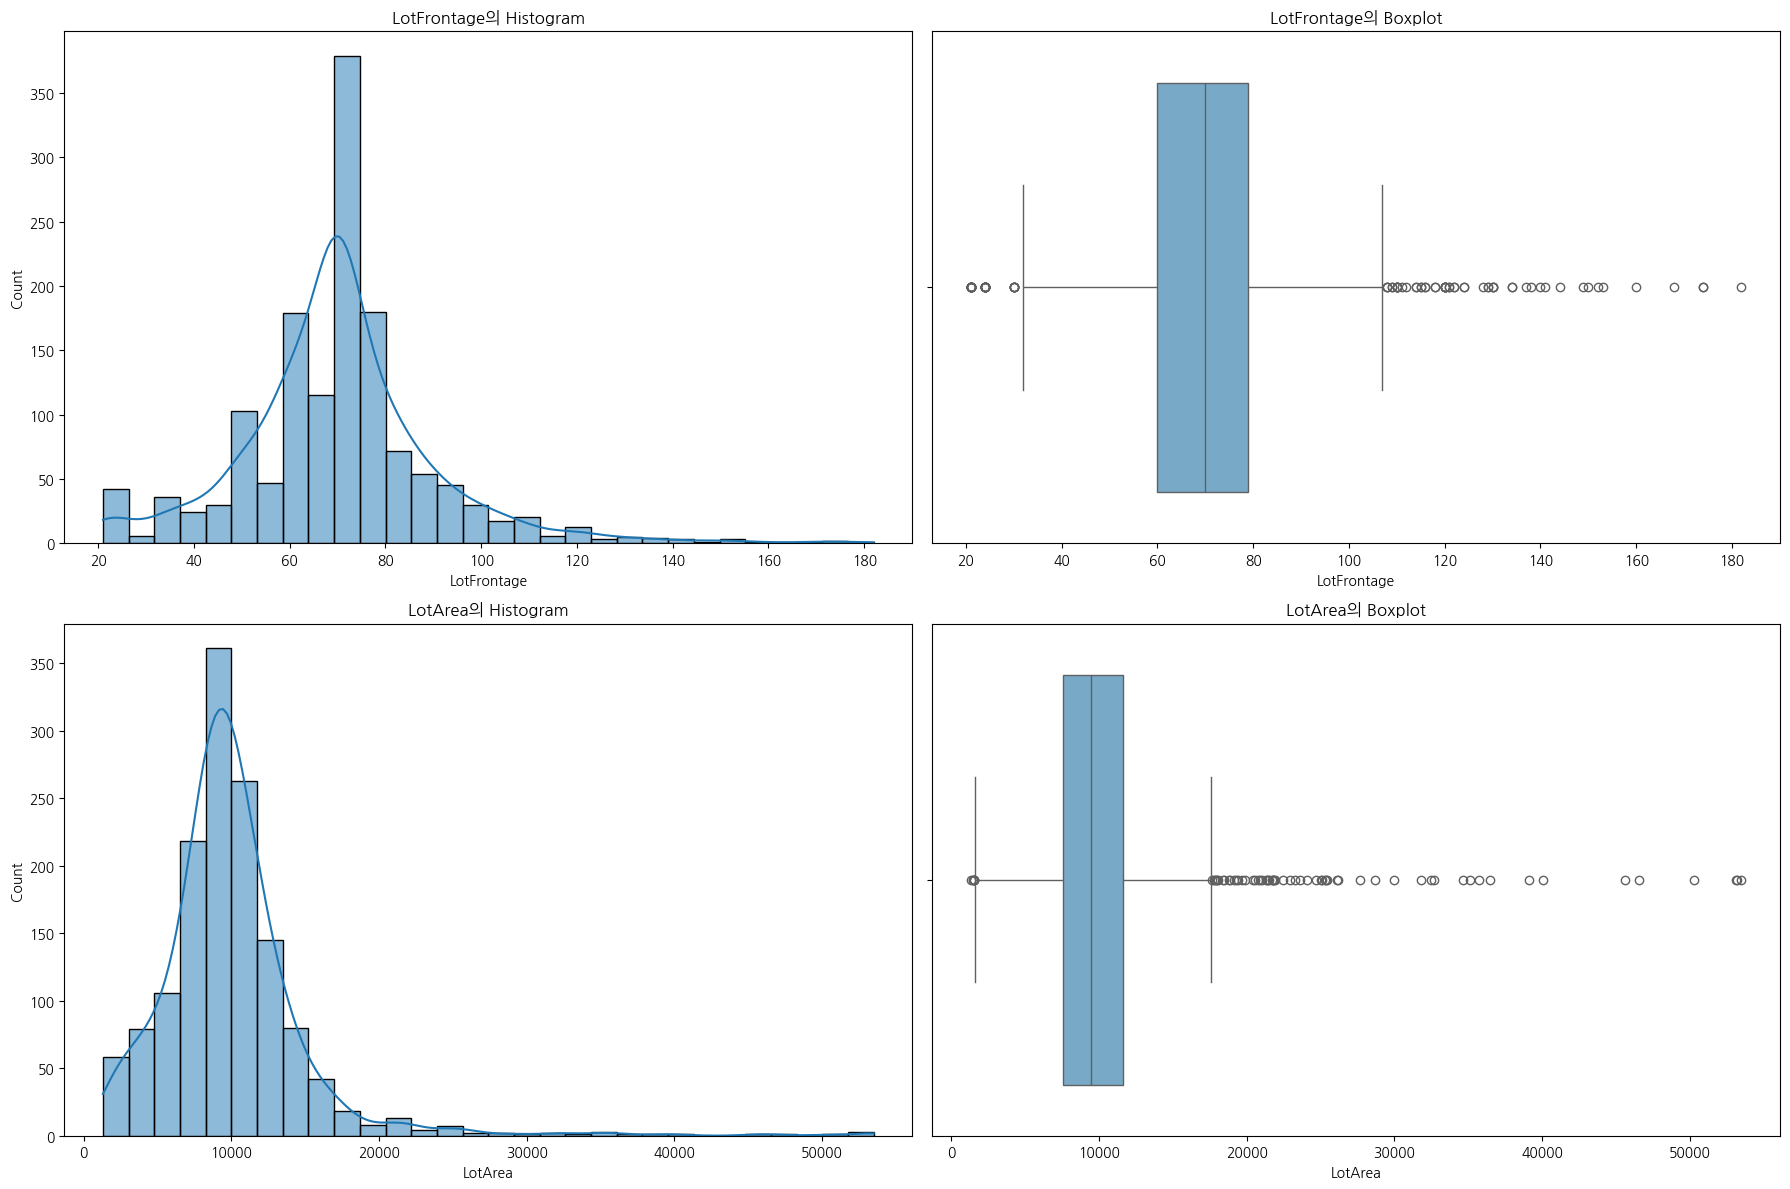

In [89]:
# 이상치 대체 이후 분포 재확인
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)  
sns.histplot(train_data_basic, x='LotFrontage', bins=30, kde=True, palette='Blues')
plt.title('LotFrontage의 Histogram')

plt.subplot(2, 2, 2) 
sns.boxplot(data=train_data_basic, x='LotFrontage', palette='Blues')
plt.title('LotFrontage의 Boxplot')

plt.subplot(2, 2, 3) 
sns.histplot(train_data_basic, x='LotArea', bins=30, kde=True, palette='Blues')
plt.title('LotArea의 Histogram')

plt.subplot(2, 2, 4) 
sns.boxplot(data=train_data_basic, x='LotArea', palette='Blues')
plt.title('LotArea의 Boxplot')

plt.tight_layout()
plt.show()

test 데이터셋과 분포가 조금 더 비슷하게 맞춰진 것을 볼 수 있음.     
그러나 여전히 왜도가 큰 분포를 보이고 있으므로 상대적으로 극단치의 영향을 덜받는 robust 스케일링을 진행하겠음

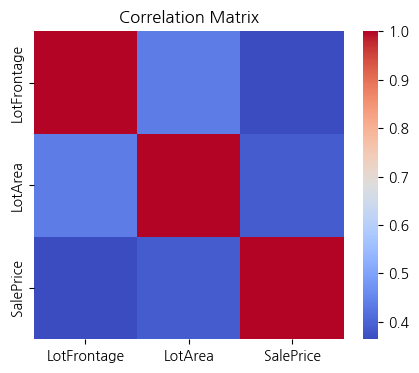


 #################### 상관관계 값 확인 ####################
             LotFrontage   LotArea  SalePrice
LotFrontage     1.000000  0.434230   0.363755
LotArea         0.434230  1.000000   0.387306
SalePrice       0.363755  0.387306   1.000000


In [93]:
# 수치형 변수의 상관관계 분석
corr_matrix = train_data_basic.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 상관관계 값 프린트
print('\n', '#'*20, '상관관계 값 확인', '#'*20)
print(corr_matrix)

SalePrice와 극단치 제거를 거친 나머지 두 피쳐 간의 상관계수는 0.3과 0.4 사이로 나타나 보통 수준의 양적 상관관계를 보임

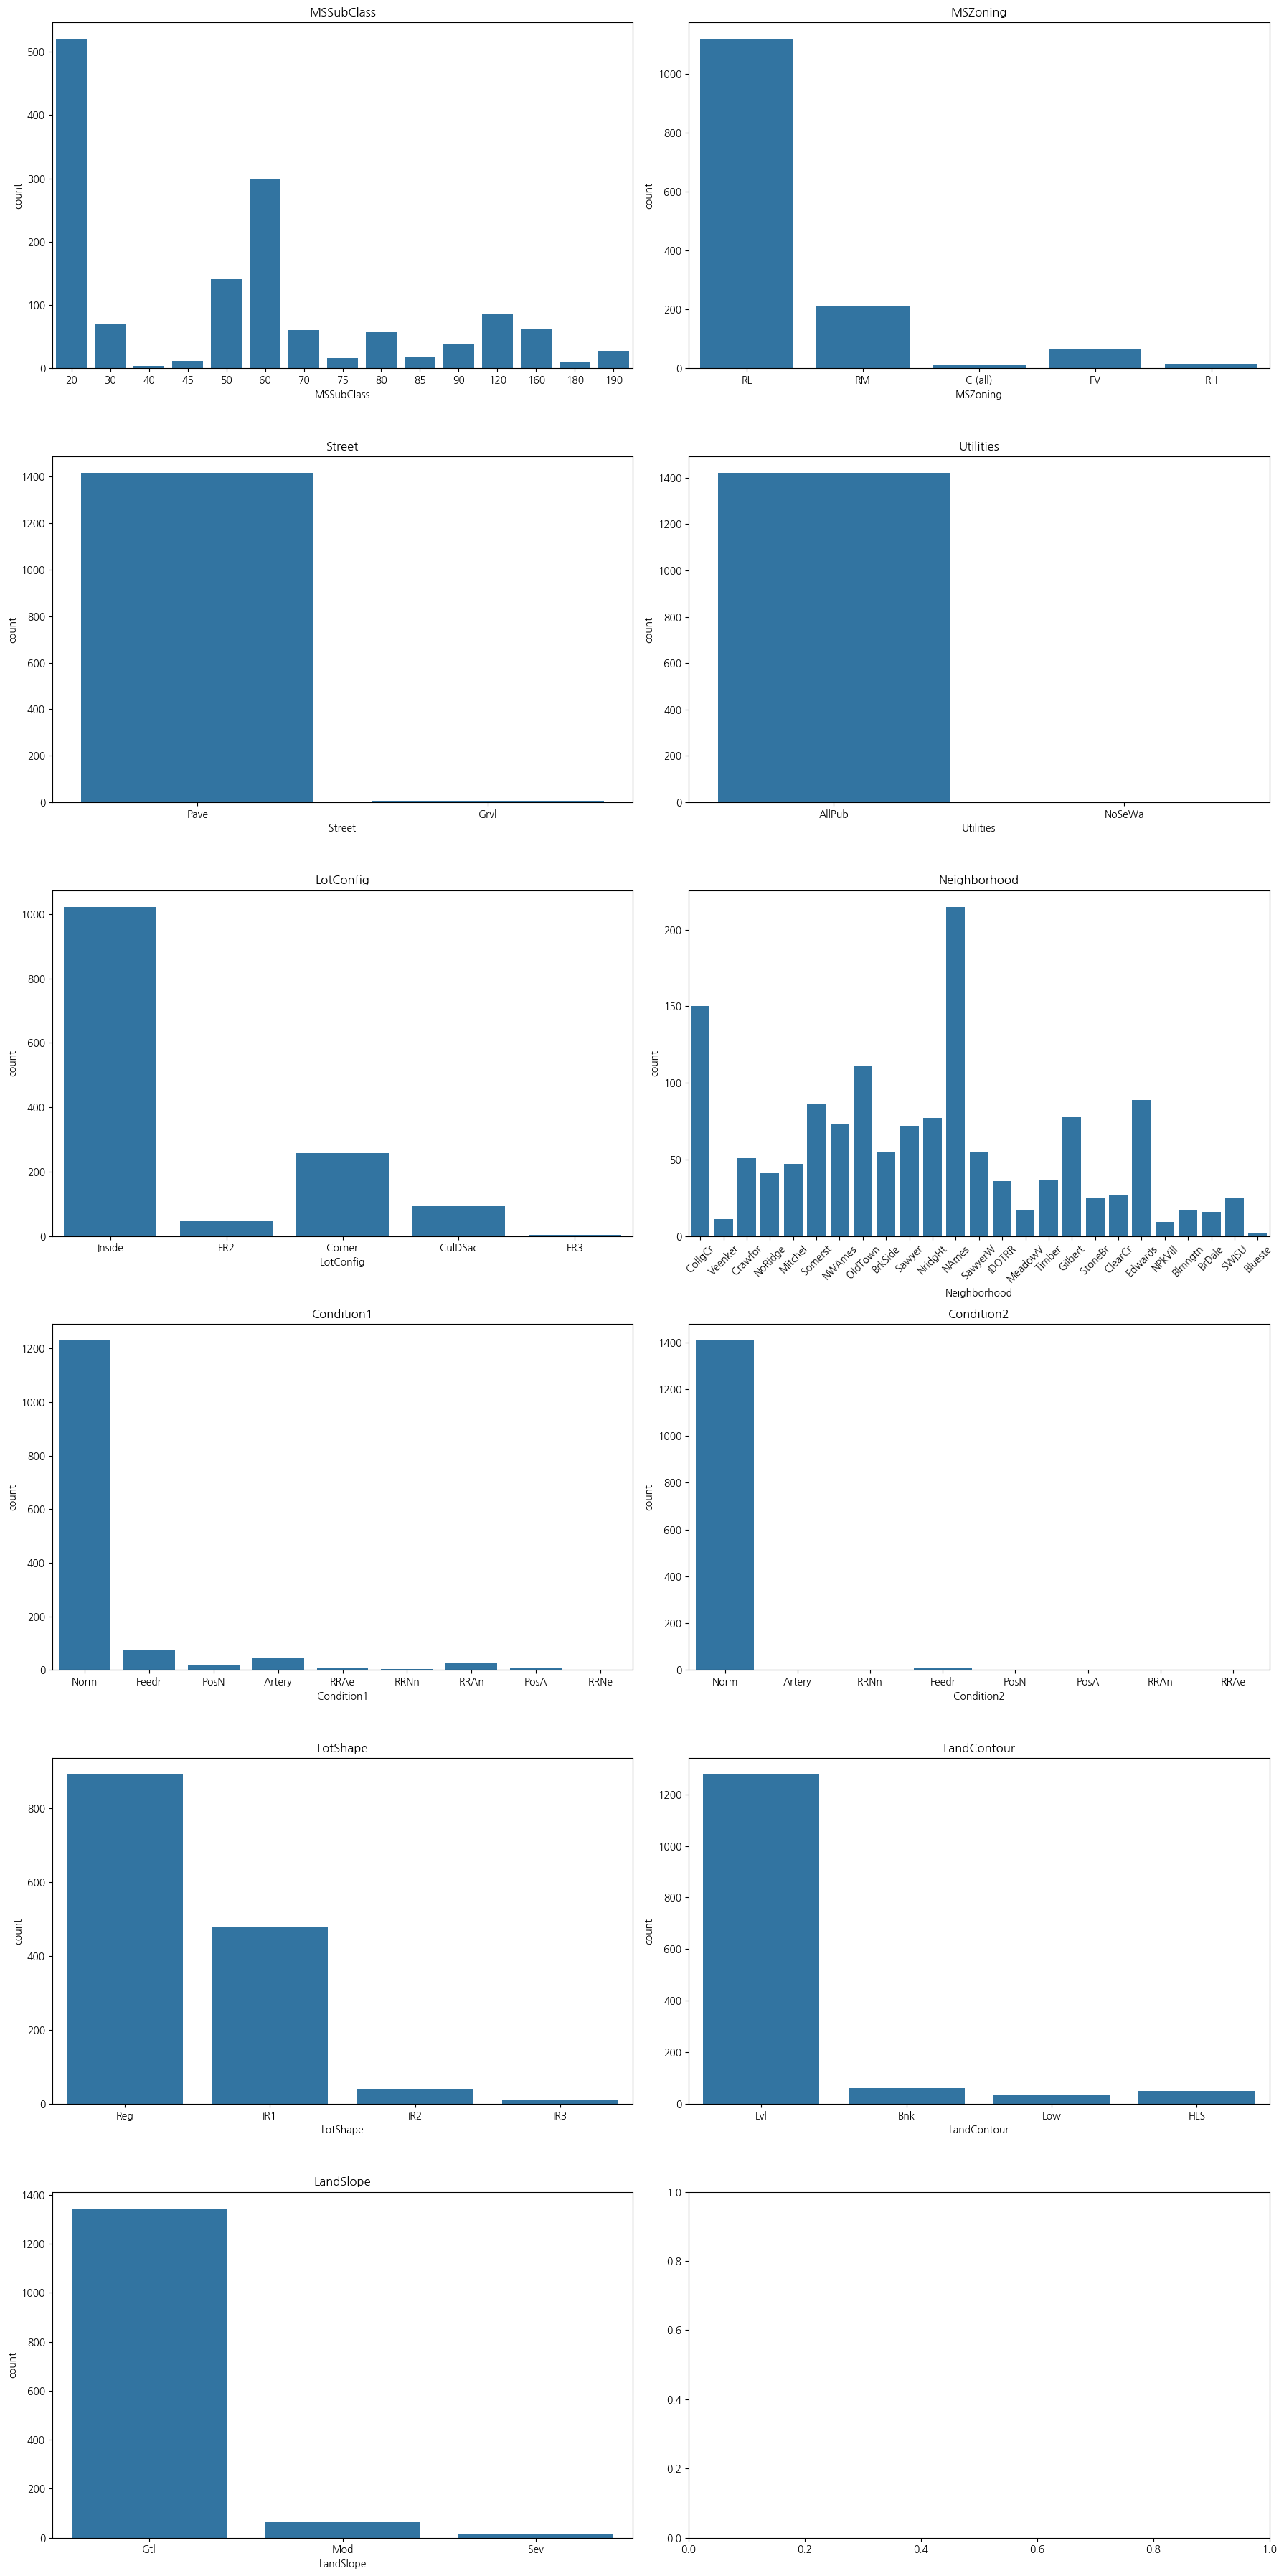

In [109]:
# 범주형 변수 분포 확인

fig, axes = plt.subplots(6, 2, figsize=(18,36))

sns.countplot(data=train_data_basic, x=basic_cols_nom[0], ax=axes[0, 0])
axes[0, 0].set_title(basic_cols_nom[0])
sns.countplot(data=train_data_basic, x=basic_cols_nom[1], ax=axes[0, 1])
axes[0, 1].set_title(basic_cols_nom[1])
sns.countplot(data=train_data_basic, x=basic_cols_nom[2], ax=axes[1, 0])
axes[1, 0].set_title(basic_cols_nom[2])
sns.countplot(data=train_data_basic, x=basic_cols_nom[3], ax=axes[1, 1])
axes[1, 1].set_title(basic_cols_nom[3])
sns.countplot(data=train_data_basic, x=basic_cols_nom[4], ax=axes[2, 0])
axes[2, 0].set_title(basic_cols_nom[4])
sns.countplot(data=train_data_basic, x=basic_cols_nom[5], ax=axes[2, 1])
axes[2, 1].set_title(basic_cols_nom[5])
axes[2, 1].tick_params(axis='x', rotation=45)  # 회전 적용
sns.countplot(data=train_data_basic, x=basic_cols_nom[6], ax=axes[3, 0])
axes[3, 0].set_title(basic_cols_nom[6])
sns.countplot(data=train_data_basic, x=basic_cols_nom[7], ax=axes[3, 1])
axes[3, 1].set_title(basic_cols_nom[7])
sns.countplot(data=train_data_basic, x=basic_cols_ord[0], ax=axes[4, 0])
axes[4, 0].set_title(basic_cols_ord[0])
sns.countplot(data=train_data_basic, x=basic_cols_ord[1], ax=axes[4, 1])
axes[4, 1].set_title(basic_cols_ord[1])
sns.countplot(data=train_data_basic, x=basic_cols_ord[2], ax=axes[5, 0])
axes[5, 0].set_title(basic_cols_ord[2])

plt.tight_layout()
plt.show()

'Street', 'Utilities', 'Condition2'는 value 간의 불균형이 지나치게 커 분석의 의미가 없을 것으로 보여 모델에서 삭제하겠음

In [111]:
# 훈련 데이터셋에서 'Street', 'Utilities', 'Condition2'컬럼 삭제
train_data_basic_cleaned = train_data_basic.drop(columns=['Street', 'Utilities', 'Condition2'])
train_data_basic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1422 non-null   float64
 1   LotArea       1422 non-null   int64  
 2   MSSubClass    1422 non-null   object 
 3   MSZoning      1422 non-null   object 
 4   LotShape      1422 non-null   object 
 5   LandContour   1422 non-null   object 
 6   LotConfig     1422 non-null   object 
 7   LandSlope     1422 non-null   object 
 8   Neighborhood  1422 non-null   object 
 9   Condition1    1422 non-null   object 
 10  SalePrice     1422 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 122.3+ KB


In [113]:
basic_cols_nom_cleaned=['MSSubClass', 
              'MSZoning', 
              'LotConfig', 
              'Neighborhood',
              'Condition1']

random forest 방식보다 범주형 피쳐를 더욱 적절히 다룰 수 있는 Catboost 방식으로 모델링하여 feature importance를 구해보겠음.

In [115]:
# Robust Scaler로 수치형 피쳐 스케일링
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_data_basic_cleaned[basic_cols_num] = scaler.fit_transform(train_data_basic_cleaned[basic_cols_num])
train_data_basic_cleaned.head()

,LotFrontage,LotArea,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,SalePrice
0,-0.265787,-0.253974,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,0.521739
1,0.523686,0.032791,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,0.197901
2,-0.107893,0.444237,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,0.701649
3,-0.528945,0.020323,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,-0.299850
4,0.734213,1.194813,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1.019490


In [155]:
# CatBoost모델링 후 Feature Importance 계산
from catboost import Pool, CatBoostRegressor

X_train = train_data_basic_cleaned.drop('SalePrice', axis=1)
y_train = train_data_basic_cleaned['SalePrice']

basic_cols_cat = basic_cols_ord + basic_cols_nom_cleaned

# initialize Train Pool
train_pool = Pool(data=X_train, label=y_train, cat_features = basic_cols_cat)

# specify the training parameters
model = CatBoostRegressor(loss_function='RMSE')

#train the model
model.fit(train_pool)

Learning rate set to 0.043285
0:	learn: 0.9317949	total: 14.5ms	remaining: 14.5s
1:	learn: 0.9113739	total: 26.8ms	remaining: 13.4s
2:	learn: 0.8945522	total: 44.3ms	remaining: 14.7s
3:	learn: 0.8775855	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8624893	total: 73.2ms	remaining: 14.6s
5:	learn: 0.8470742	total: 85.4ms	remaining: 14.2s
6:	learn: 0.8330518	total: 98.3ms	remaining: 13.9s
7:	learn: 0.8202421	total: 106ms	remaining: 13.1s
8:	learn: 0.8078191	total: 118ms	remaining: 13s
9:	learn: 0.7955741	total: 130ms	remaining: 12.9s
10:	learn: 0.7839998	total: 143ms	remaining: 12.9s
11:	learn: 0.7736555	total: 151ms	remaining: 12.4s
12:	learn: 0.7636182	total: 158ms	remaining: 12s
13:	learn: 0.7546487	total: 172ms	remaining: 12.1s
14:	learn: 0.7450164	total: 184ms	remaining: 12.1s
15:	learn: 0.7366866	total: 195ms	remaining: 12s
16:	learn: 0.7278339	total: 210ms	remaining: 12.1s
17:	learn: 0.7202760	total: 228ms	remaining: 12.4s
18:	learn: 0.7138380	total: 246ms	remaining: 12.7s
19:	learn:

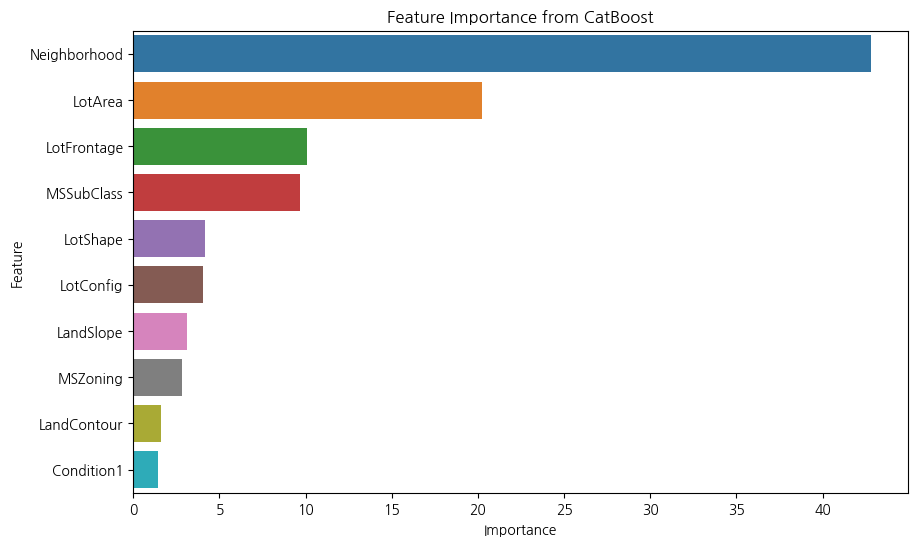

In [157]:
importances = model.get_feature_importance(train_pool)

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='tab10')
plt.title('Feature Importance from CatBoost')
plt.show()

In [159]:
pd.set_option('display.max_rows', None)
importance_df

,Feature,Importance
8,Neighborhood,42.817824
1,LotArea,20.222414
0,LotFrontage,10.101801
2,MSSubClass,9.665042
4,LotShape,4.139547
6,LotConfig,4.023585
7,LandSlope,3.119055
3,MSZoning,2.841681
5,LandContour,1.603525
9,Condition1,1.465525


CatBoost 모델을 통해 피쳐 중요도를 확인한 결과          
Neighborhood(인접지역), LotArea(대지 면적), LotFrontage(도로와 연결된 주택의 전면 길이), MSSubClass(판매된 주택의 유형) 등의 순으로 나타났으며        
나머지 피쳐들의 중요도는 상대적으로 떨어지는 것으로 나타남.      

(이는 Random Forest 방식으로 산출한 피쳐 중요도를 비교했을 때 LotFrontage(4->3순위)와 MSSubClass(3->4순위)를 제외하면 상위 Top4 간에는 큰 변화가 없으며,      
Top5 이하부터 중요도가 크게 줄어든다는 점도 동일하게 나타남)           